##### Reading CSV file
##### Displays basic data information

In [2]:
import os
import pandas as pd

file_path = os.path.join("C:/Users/txy18/Desktop/Research method coursework2/Results_21MAR2022_nokcaladjust.csv")

df = pd.read_csv(file_path)

df_info = df.info()
df_head = df.head()
missing_values = df.isnull().sum()

df_info, df_head, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mc_run_id       72000 non-null  int64  
 1   grouping        72000 non-null  object 
 2   mean_ghgs       72000 non-null  float64
 3   mean_land       72000 non-null  float64
 4   mean_watscar    72000 non-null  float64
 5   mean_eut        72000 non-null  float64
 6   mean_ghgs_ch4   72000 non-null  float64
 7   mean_ghgs_n2o   72000 non-null  float64
 8   mean_bio        72000 non-null  float64
 9   mean_watuse     72000 non-null  float64
 10  mean_acid       72000 non-null  float64
 11  sd_ghgs         72000 non-null  float64
 12  sd_land         72000 non-null  float64
 13  sd_watscar      72000 non-null  float64
 14  sd_eut          72000 non-null  float64
 15  sd_ghgs_ch4     72000 non-null  float64
 16  sd_ghgs_n2o     72000 non-null  float64
 17  sd_bio          72000 non-null 

(None,
    mc_run_id           grouping  mean_ghgs  mean_land  mean_watscar  \
 0          1  fish_female_20-29   5.377071   8.589807   14012.27478   
 1          1  fish_female_30-39   5.376457   8.620238   15030.26610   
 2          1  fish_female_40-49   5.169838   8.304831   15441.25934   
 3          1  fish_female_50-59   4.933744   7.880759   16244.68021   
 4          1  fish_female_60-69   5.428442   8.701867   18364.95302   
 
     mean_eut  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  ...  \
 0  23.553012       1.165277       0.344528  478.802638   669.154382  ...   
 1  23.831419       1.152422       0.326276  469.573862   697.161548  ...   
 2  23.419815       1.095640       0.305898  435.534050   687.733569  ...   
 3  23.459450       0.995247       0.285800  382.097727   686.763592  ...   
 4  25.469176       1.127873       0.315651  435.578230   751.050809  ...   
 
       sd_eut  sd_ghgs_ch4  sd_ghgs_n2o      sd_bio   sd_watuse    sd_acid  \
 0  13.788241    

##### Read the CSV file correctly
##### Delete irrelevant column
##### Calculate a new variable: total environmental impact
##### Normalized processing

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = "C:/Users/txy18/Desktop/Research method coursework2/Results_21MAR2022_nokcaladjust.csv"
df = pd.read_csv(file_path)

df_cleaned = df.drop(columns=["mc_run_id"], errors="ignore")

df_cleaned["total_impact"] = (
    df_cleaned["mean_ghgs"] + df_cleaned["mean_land"] + df_cleaned["mean_watscar"] +
    df_cleaned["mean_eut"] + df_cleaned["mean_ghgs_ch4"] + df_cleaned["mean_ghgs_n2o"] +
    df_cleaned["mean_bio"] + df_cleaned["mean_watuse"] + df_cleaned["mean_acid"]
)

scaler = MinMaxScaler()
columns_to_normalize = ["mean_ghgs", "mean_land", "mean_watscar", "mean_eut", "mean_ghgs_ch4",
                        "mean_ghgs_n2o", "mean_bio", "mean_watuse", "mean_acid", "total_impact"]

df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])

print(" Data preprocessing complete! ")


 Data preprocessing complete! 


##### Formatted data
##### Rename to the specified name

In [4]:
df_final = df_cleaned.rename(columns={
    "grouping": "participant_id", 
    "diet_group": "diet_type",
    "sex": "gender",
    "age_group": "age_group",
    "mean_ghgs": "GHG_emissions_kgCO2e",
    "mean_land": "Agricultural_land_use_m2",
    "mean_watscar": "Water_scarcity_impact",
    "mean_eut": "Eutrophication_potential_gPO4e",
    "mean_ghgs_ch4": "Methane_CH4_kg",
    "mean_ghgs_n2o": "Nitrous_oxide_N2O_kg",
    "mean_bio": "Biodiversity_impact",
    "mean_watuse": "Agricultural_water_usage_m3",
    "mean_acid": "Acidification_potential"
})

df_final = df_final[[
    "participant_id", "diet_type", "gender", "age_group",
    "GHG_emissions_kgCO2e", "Agricultural_land_use_m2", "Water_scarcity_impact",
    "Eutrophication_potential_gPO4e", "Methane_CH4_kg", "Nitrous_oxide_N2O_kg",
    "Biodiversity_impact", "Agricultural_water_usage_m3", "Acidification_potential"
]]

csv_output_path = r"C:\Users\txy18\Desktop\processed_data.csv"
df_final.to_csv(csv_output_path, index=False)

print(f" The CSV file has been saved to: {csv_output_path}")

 The CSV file has been saved to: C:\Users\txy18\Desktop\processed_data.csv


In [9]:
import pandas as pd

file_path = "Results_21MAR2022_nokcaladjust.csv"
df = pd.read_csv(file_path)

print("The actual column names are as follows：")
print(df.columns.tolist())

The actual column names are as follows：
['mc_run_id', 'grouping', 'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid', 'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut', 'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid', 'n_participants', 'sex', 'diet_group', 'age_group']


### Treemap

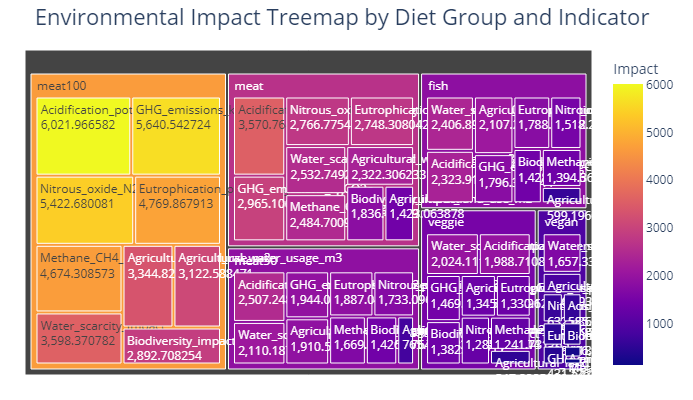

In [8]:
import pandas as pd
import plotly.express as px
import plotly.io as pio  

df = pd.read_csv("C:/Users/txy18/Desktop/processed_data.csv")

df_melted = df.melt(
    id_vars=["diet_type"],
    value_vars=[
        "GHG_emissions_kgCO2e",
        "Agricultural_land_use_m2",
        "Water_scarcity_impact",
        "Eutrophication_potential_gPO4e",
        "Methane_CH4_kg",
        "Nitrous_oxide_N2O_kg",
        "Biodiversity_impact",
        "Agricultural_water_usage_m3",
        "Acidification_potential"
    ],
    var_name="Indicator",
    value_name="Impact"
)

df_grouped = df_melted.groupby(["diet_type", "Indicator"]).sum().reset_index()

df_grouped["Label"] = df_grouped["diet_type"] + " - " + df_grouped["Indicator"]

fig = px.treemap(
    df_grouped,
    path=["diet_type", "Indicator"],
    values="Impact",
    color="Impact",
    color_continuous_scale="Plasma",
    title="Environmental Impact Treemap by Diet Group and Indicator",
    hover_data={
        "Impact": True,
        "diet_type": True,
        "Indicator": True
    }
)

fig.update_traces(
    textinfo="label+value",  
    hovertemplate='<b>%{label}</b><br>Impact: %{value:.2f}<extra></extra>'
)

fig.update_layout(
    title_font_size=22,
    margin=dict(t=50, l=25, r=25, b=25),
    uniformtext=dict(minsize=10, mode='show'),
    width=1000,
    height=400
)

pio.write_html(fig, file="C:/Users/txy18/Desktop/treemap_diet.html", auto_open=False)

fig.show()


### Supplementary diagram - heat map

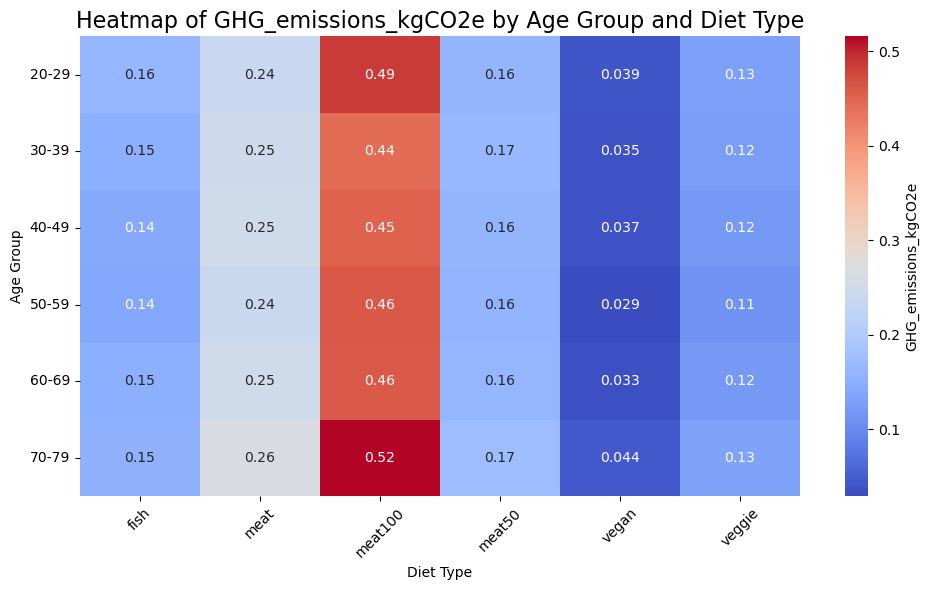

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

file_path = "C:/Users/txy18/Desktop/Research method coursework2/Results_21MAR2022_nokcaladjust.csv"
df = pd.read_csv(file_path)

df_cleaned = df.drop(columns=["mc_run_id"], errors="ignore")

df_cleaned["total_impact"] = (
    df_cleaned["mean_ghgs"] + df_cleaned["mean_land"] + df_cleaned["mean_watscar"] +
    df_cleaned["mean_eut"] + df_cleaned["mean_ghgs_ch4"] + df_cleaned["mean_ghgs_n2o"] +
    df_cleaned["mean_bio"] + df_cleaned["mean_watuse"] + df_cleaned["mean_acid"]
)

columns_to_normalize = [
    "mean_ghgs", "mean_land", "mean_watscar", "mean_eut",
    "mean_ghgs_ch4", "mean_ghgs_n2o", "mean_bio", "mean_watuse",
    "mean_acid", "total_impact"
]
scaler = MinMaxScaler()
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])

df_final = df_cleaned.rename(columns={
    "grouping": "participant_id",
    "diet_group": "diet_type",
    "sex": "gender",
    "age_group": "age_group",
    "mean_ghgs": "GHG_emissions_kgCO2e",
    "mean_land": "Agricultural_land_use_m2",
    "mean_watscar": "Water_scarcity_impact",
    "mean_eut": "Eutrophication_potential_gPO4e",
    "mean_ghgs_ch4": "Methane_CH4_kg",
    "mean_ghgs_n2o": "Nitrous_oxide_N2O_kg",
    "mean_bio": "Biodiversity_impact",
    "mean_watuse": "Agricultural_water_usage_m3",
    "mean_acid": "Acidification_potential"
})

df_final = df_final[[
    "participant_id", "diet_type", "gender", "age_group",
    "GHG_emissions_kgCO2e", "Agricultural_land_use_m2", "Water_scarcity_impact",
    "Eutrophication_potential_gPO4e", "Methane_CH4_kg", "Nitrous_oxide_N2O_kg",
    "Biodiversity_impact", "Agricultural_water_usage_m3", "Acidification_potential"
]]


grouped = df_final.groupby(["age_group", "diet_type"]).mean(numeric_only=True).reset_index()

target_column = "GHG_emissions_kgCO2e"
heat_data = grouped.pivot(index="age_group", columns="diet_type", values=target_column)

plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, cmap="coolwarm", cbar_kws={"label": target_column})
plt.title(f"Heatmap of {target_column} by Age Group and Diet Type", fontsize=16)
plt.ylabel("Age Group")
plt.xlabel("Diet Type")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
